# Week 4 - Partial Least Squares Regression

In [7]:
import scipy as sp, numpy as np
from sklearn.preprocessing import scale, StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import LeaveOneGroupOut, LeaveOneOut
import matplotlib.pyplot as plt

data = sp.io.loadmat('wk4_Cosgrove-data.mat', squeeze_me=True)['s']

X = data['X'].item() # the untransformed data matrix (66x102)
Y = data['Y'].item() # the untransformed LDH release at 48hours. (66x1)
phosphoproteins = data['phosphoproteins'].item() # names of phosphoproteins
conditions = data['conditions'].item() # cell array of the 66 conditions
drugList = data['drugList'].item() # description of the drugs used in each of the 66 conditions
drugListToxic = data['drugListToxic'].item() # binary value corresponding to whether drugList[i] is toxic
drugs = data['drugs'].item() # binary matrix mapping which measurements correspond to a drug treatment in drugList
cytokineList = data['cytokineList'].item() # cell array of cytokine treatments
ind4pProtein = data['ind4pProtein'].item() # the column indices corresponding to measurements of the 4 phosphoprotein subset

#### (1) Perform PLSR on the matrixes X and Y. Plot the percent variance explained. How many principal components do you need for each to explain 90% of the variance? Discuss your findings.

Hint: Be sure to normalize each dataset as needed for the analysis.

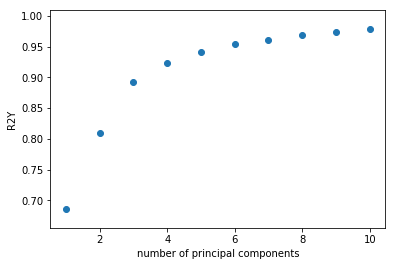

In [17]:
# Answer
Y_zs = scale(Y[:, -1])
X_zs = scale(X)

R2Y = np.zeros(10)
for i in range(R2Y.size):
    PLS = PLSRegression(n_components=i + 1)

    PLS.fit(X, Y[:, -1])

    R2Y[i] = PLS.score(X, Y[:, -1])

plt.scatter(np.arange(R2Y.size) + 1, R2Y);
plt.xlabel("number of principal components");
plt.ylabel("R2Y");

#### (2) Recreate the Figure S2A plot from Cosgrove et al. supplementary information. This is the PLSR scores plot (for PC1 and PC2), with toxic drugs colored according to the drug type and all other drugs are not colored. Use the drugList, drugListToxic to identify these categories.

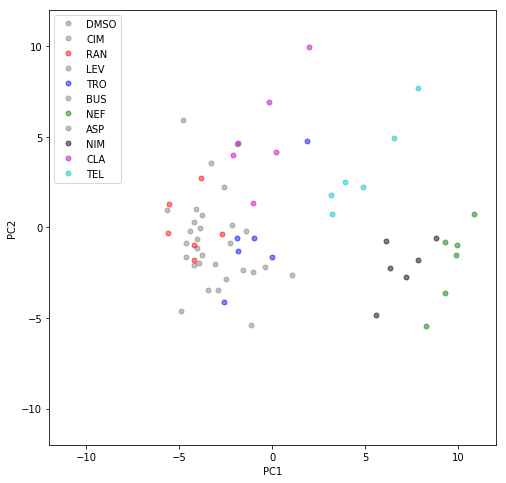

In [21]:
# Answer
PLS = PLSRegression(n_components=4)
xScores, yScores = PLS.fit_transform(X_zs, Y_zs)

toxMask = drugListToxic
tox_iters = np.arange(11)[toxMask==1]
colors = ['r','b','g','k','m','c']
c_indx = -1

#plot the drug scores (PCs) one at a time
plt.figure(figsize=(8,8))
for indx in np.arange(drugs.shape[1]): #numbers between 0 and 10
    #Check whether the drug is toxic or not and select corresponding color.
    if indx not in tox_iters:
        C = 'gray'
        alph = 0.5
    else:
        c_indx +=1
        C = colors[c_indx]
    mask = drugs[:,indx]==1
    xVals = xScores[:,0]
    yVals = xScores[:,1]
    drugX = xVals[mask]
    drugY = yVals[mask]
    plt.plot(drugX, drugY, '.', markersize = 10, c=C, alpha = alph, label = drugList[indx])

plt.xlim(-12,12);
plt.ylim(-12,12);
plt.xlabel("PC1");
plt.ylabel("PC2");
plt.legend(loc = 2);

#### (3) Create the loadings plot corresponding to (2). Interpret the results shown on the plot.

In [22]:
# Answer
loadings = PLS.x_loadings_
yloadings = PLS.y_loadings_
print(loadings.shape)

(102, 4)


#### (4) Recreate a 4-principal component model using PLSR with just the final 4 phosphoprotein model. Plot predicted v. observed LDH for this model. Report the model fitness ($R^2$). Define here how you are calculating $R^2$.

In [5]:
# Answer

#### (6) Cosgrove *et al* discusses their method for model validation using leave-one-out cross-validation. Calculate all LDH predictions for leave-one-out cross-validation and calculate the R^2 value for the resulting yfit values. What is the R^2 value? Why do you think it’s important to perform cross-validation?

In [6]:
# Answer

#### (7) Now, instead of performing LOOCV, let's perform leave-one-cytokine-out cross-validation. That is, one cytokine at a time, leave out all the data for the `NoCyt`, `IL-1`, `LPS`, `TNF`, `IL-6`, or `Mix` conditions.

Hint: Look at `sklearn.model_selection.LeaveOneGroupOut`.

How does this affect your cross-validation? How do the two approaches here differ? When might each be most appropriate?

In [7]:
# Answer